<a href="https://colab.research.google.com/github/JakeOh/202007_itw_bd18/blob/master/lab_python/python51_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 프레임의 문자열 데이터 컬럼 다루기

In [1]:
import pandas as pd

movies 데이터 프레임

In [2]:
file_path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/movielens/movies.dat'

github에 있는 dat 파일을 읽어서 데이터 프레임 생성

In [8]:
# encoding='cp1252': 영문 Windows의 기본 인코딩 타입.
# encoding='cp949': 한글 Windows의 기본 인코딩 타입.
movies = pd.read_csv(file_path, sep='::', encoding='cp1252',
                     header=None,  # 파일의 첫번째 줄이 헤더(컬럼 이름)이 아니고 데이터일 때
                     names=['movie_id', 'title', 'genres']  # 컬럼 이름 설정
                     )
movies

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


장르가 Animation인 부분 집합: genres 컬럼에 'Animation' 단어가 포함된 row들로 이루어진 데이터 프레임.

In [12]:
animations = movies[movies['genres'].str.contains('Animation')]
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


장르가 로맨틱 코미디인 부분 집합(romance & comedy)

In [13]:
romance_comedy = movies[movies['genres'].str.contains('Romance') &
                        movies['genres'].str.contains('Comedy')]
romance_comedy

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


movies 데이터 프레임에 year 컬럼을 추가 - 영화 개봉(or 제작) 연도

In [18]:
title = 'Toy Story (1995)'
title[-5:-1]  # 문자열 slicing

'1995'

In [29]:
movies['year'] = movies['title'].str[-5:-1]  # 문자열(object)들의 Series
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [30]:
movies.dtypes

movie_id     int64
title       object
genres      object
year        object
dtype: object

In [31]:
movies['year'] = movies['year'].astype('int32')
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [32]:
movies.dtypes

movie_id     int64
title       object
genres      object
year         int32
dtype: object

연도별 영화 개봉 숫자
* 개봉 영화 숫자의 내림차순 정렬
* 연도의 오름차순 정렬

In [33]:
movies['year'].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1929      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

In [34]:
movies['year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

가장 개봉 영화 개수가 많은 연도 상위 10개

In [35]:
movies['year'].value_counts()[:10]

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

연도별 영화 개수 선 그래프(count ~ year)

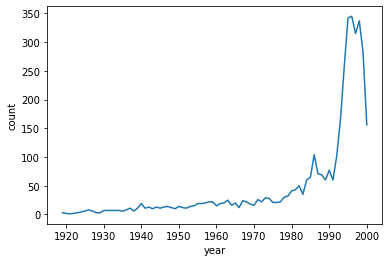

In [39]:
import matplotlib.pyplot as plt

year_counts = movies['year'].value_counts().sort_index()
plt.plot(year_counts)
plt.xlabel('year')
plt.ylabel('count')
plt.show()